# Social Media Analytics - FIFA World Cup Final 2022

## **Topik: Piala Dunia 2022 Qatar**

Piala Dunia 2022 Qatar telah usai sejak tanggal 19 Desember 2022. Namun, euforia pertandingan sepak bola yang diselenggarakan 4 tahun sekali ini masih terasa hingga saat ini. Terlepas dari banyaknya kontroversi dalam penyelenggaraan acara ini, Piala Dunia 2022 Qatar sukses diselenggarakan dan ditonton langsung di lokasi oleh lebih dari 3.8 juta orang. Berlangsung sejak 20 November - 18 Desember 2022, banyak orang menyampaikan beragam pendapatnya melalui media sosial, salah satunya Twitter. Kami memanfaatkan twitter sebagai sumber dataset yang akan kami olah dengan metode Social Media Analytics (SMA). Berikut tahapan yang kami lakukan dalam menganalisanya...

## Preprocessing

### Import Modules

Pertama, dilakukan instalasi module twint dan tweepy untuk mengambil data dari Twitter. Kemudian, dilakukan import modul-modul lainnya untuk pengolahan data selanjutnya.

In [ ]:
!pip install --upgrade git+https://github.com/kevctae/twint.git
!pip install twython
import warnings; warnings.simplefilter('ignore')
!pip install tweepy
import tweepy, json, nltk, urllib.request, requests
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs

  Cloning https://github.com/kevctae/twint.git to /tmp/pip-req-build-yd14q7gs
  Running command git clone --filter=blob:none --quiet https://github.com/kevctae/twint.git /tmp/pip-req-build-yd14q7gs
  Resolved https://github.com/kevctae/twint.git to commit a41158492b87ce061b7e3f032f06e3ea8dd37723
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.4/265.4 KB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.3/385.3 KB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 KB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 KB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3

Selanjutnya, dilakukan pula instalasi modul Sastrawi untuk mengubah kata berimbuhan dalam Bahasa Indonesia dan juga modul unidecode untuk mengolah simbol dan karakter nonlatin.

In [ ]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import itertools, re, nltk
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns 
from matplotlib.colors import ListedColormap
from textblob import TextBlob
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
!pip install unidecode
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm

factory = StopWordRemoverFactory()
stemmer = StemmerFactory().create_stemmer()
sns.set(style="ticks", color_codes=True)
random_state = 170
'Done'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 34.2 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 19.8 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


'Done'

In [ ]:
!pip install nest_asyncio

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Loading Stopwords: Ada beberapa cara

Sastrawi_StopWords_id = factory.get_stop_words()

print(Sastrawi_StopWords_id)
print(len(Sastrawi_StopWords_id))

Sastrawi_StopWords_id = set(Sastrawi_StopWords_id)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

### Crawling/Scrapping Data

Kemudian, kami mulai scrapping data dari twitter menggunakan modul twint dengan keyword "pildun" dan configuration limit sebesar 20000.

In [ ]:
import twint
import nest_asyncio
import pandas as pd

nest_asyncio.apply()
config = twint.Config()
config.Hide_output = True
config.Pandas = True

#config.Username = "elonmusk"
config.Search = "pildun"
config.Limit = 20000

twint.run.Search(config)
data = twint.storage.panda.Tweets_df
del twint, config, nest_asyncio
print(data.shape)

data.head()

(20009, 38)


,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1608676998733520899,1608661439522426880,1.672373e+12,2022-12-30 04:10:58,+0000,,@FaktaSepakbola Nobar final pildun di SMS aja ...,in,[],[],...,,,,,,"[{'screen_name': 'FaktaSepakbola', 'name': 'Fa...",,,,
1,1608676183033643008,1608618792590118912,1.672373e+12,2022-12-30 04:07:44,+0000,,@convomf budak tiktok pildun ya gini https://...,tr,[],[],...,,,,,,"[{'screen_name': 'convomf', 'name': 'Convomf',...",,,,
2,1608675401815183360,1608674272280711168,1.672373e+12,2022-12-30 04:04:38,+0000,,"@plumgorjes Berasa pildun yaaak wkwkwkwk, seme...",in,[usuttuntastragedikanjuruhan],[],...,,,,,,"[{'screen_name': 'plumgorjes', 'name': 'miss',...",,,,
3,1608672564901187584,1608661439522426880,1.672372e+12,2022-12-30 03:53:21,+0000,,@NgMinHtet1 @FaktaSepakbola Yg cuma duduk² bia...,in,[],[],...,,,,,,"[{'screen_name': 'NgMinHtet1', 'name': 'ku smp...",,,,
4,1608671061935284224,1608381620771491841,1.672372e+12,2022-12-30 03:47:23,+0000,,@Fafifuuhfzz @panditfootball Kebanyakan nonton...,in,[],[],...,,,,,,"[{'screen_name': 'Fafifuuhfzz', 'name': 'Netij...",,,,


Diperoleh 20009 baris data twitter yang mengandung kata tersebut, dan diambil contoh 5 data teratasnya seperti output di atas. Selanjutnya, dilakukan pendefinisian fungsi cleantext untuk tokenisasi semua bentuk tweet yang di dalamnya terdapat beragam karakter dan simbol agar mudah diolah dan dipahami.

In [ ]:
def cleanText(txt):
    docx = unidecode(unescape(txt.lower().strip()))
    urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    docx = re.sub(urlPattern,' ', docx) # Remove links
    docx = re.sub(r'[^\w]', ' ', docx) # Remove Symbol
    Tokens = TextBlob(docx).words # Tokenisasi 
    docx = ' '.join([t for t in Tokens if str(t) not in Sastrawi_StopWords_id and len(t)>2]) # filtering Stopwords 
    docx = stemmer.stem(docx)
    return docx 

In [ ]:
df = data[['date','tweet','username']]
df

,date,tweet,username
0,2022-12-30 04:10:58,@FaktaSepakbola Nobar final pildun di SMS aja ...,tusukgigiajaib
1,2022-12-30 04:07:44,@convomf budak tiktok pildun ya gini https://...,komuluna
2,2022-12-30 04:04:38,"@plumgorjes Berasa pildun yaaak wkwkwkwk, seme...",seblakperongga
3,2022-12-30 03:53:21,@NgMinHtet1 @FaktaSepakbola Yg cuma duduk² bia...,Bakwanweciote2
4,2022-12-30 03:47:23,@Fafifuuhfzz @panditfootball Kebanyakan nonton...,Sabilputra34
...,...,...,...
20004,2022-12-18 17:32:12,"cmat tidur semua,yg gi tegang krn ticketing bs...",ssunsunday
20005,2022-12-18 17:32:10,"orang paling beruntung emang messi, udahlah ti...",ebotboti
20006,2022-12-18 17:32:10,nonton bareng pildun bersama taehyun uwu,just_uptome
20007,2022-12-18 17:32:09,@cimorysqueezs FRANCE INI SERING MENANG WEH DI...,crynghtclub


Pada bagian di bawah ini, dilakukan cleaning datanya sehingga hanya diperoleh kata dasar dari tiap-tiap kata pada tweet dengan format waktu, tweet, username pengguna twitter, dan tweet bersihnya. 

In [ ]:
df['clean_tweet'] = '' # inititate kolom kosong
for idx, post in tqdm(df.iterrows()):
    df.at[idx, 'clean_tweet'] = cleanText(post.tweet)
    
df.head()

20017it [1:13:54,  4.51it/s]


,date,tweet,username,clean_tweet
0,2022-12-29 19:21:29,@MadridisWay @Tresnadika07 @idextratime emang ...,NorthBoysGaruda,madridisway tresnadika07 idextratime emang leg...
1,2022-12-29 19:20:28,@ChovaHerman Event AFF aja kayak gini suporter...,akustikinesis,chovaherman event aff aja kayak gin suporter n...
2,2022-12-29 19:15:48,Di pildun brazil gatot &gt; yg juara malah arg...,bagustrchyo,pildun brazil gatot juara malah argentina pele...
3,2022-12-29 19:02:25,Neymar otw pildun,almufid20,neymar otw pildun
4,2022-12-29 18:57:18,"@benwaee_ @jebreeetmedia Gw juga heran, kemari...",Ramdhan__Wahyu,benwaee jebreeetmedia heran kemarin pildun gak


Lalu, data twitter yang sudah bersih sebelumnya disimpan ke dalam format csv untuk dapat diolah pada tahap selanjutnya.

In [ ]:
df[['clean_tweet']].to_csv("cleaned_tweet.txt", index=False, encoding='utf8', header=False)

In [ ]:
input_1 = ''

## Visualisasi - Simple Text Analytics

### Word Cloud

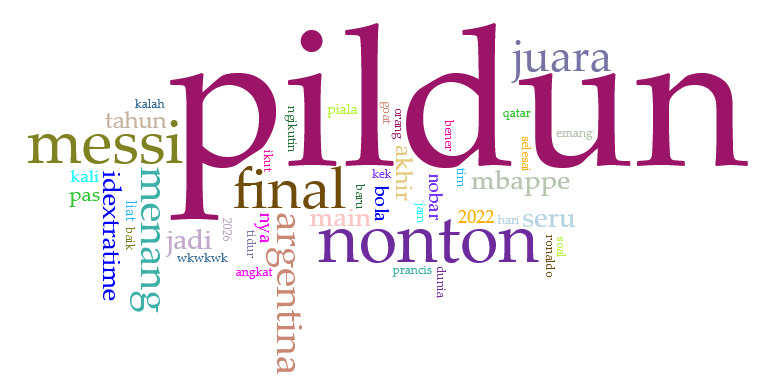

In [ ]:
from IPython import display
display.Image("/work/1_word cloud.jpeg")

Interpretasi:

Berdasarkan hasil WorkCloud tentang pildun (piala dunia) di atas diketahui kata apa yang sering menjadi perbincangan netizen di twitter tentang piala dunia. Pildun memiliki beragam respon dan opini yang menarik, tetapi kata yang paling sering diungkapkan oleh mereka untuk menggambarkan pildun yaitu nonton, final, messi, menang, argentina, dan juara. Selain itu, netizen juga sering mengaitkan pildun dengan tokoh pemain bola terkenal lain asal Prancis yaitu Mbappe. Artinya, ketika netizen membahas mengenai topik piala dunia sering kali juga membahas negara yang masuk dalam kualifikasi finalnya hingga tokoh penting yang berperan, seperti Messi dan Mbappe.

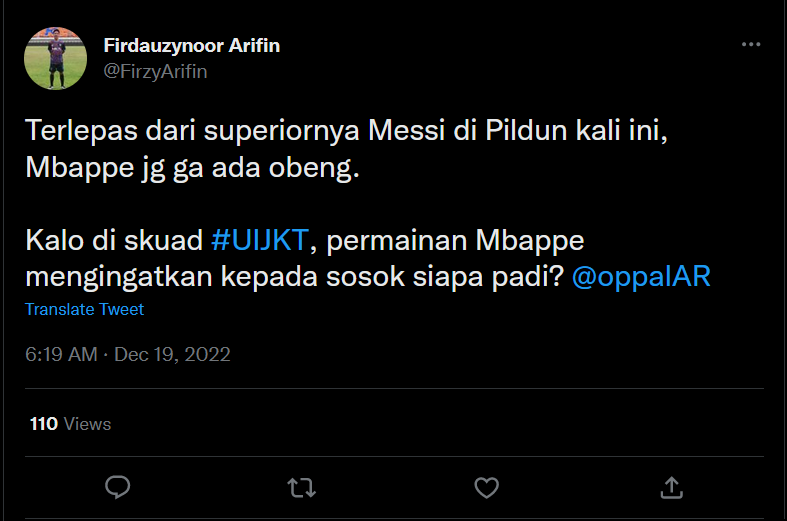

In [ ]:
display.Image("/work/pildun mbappe.png")

### Links

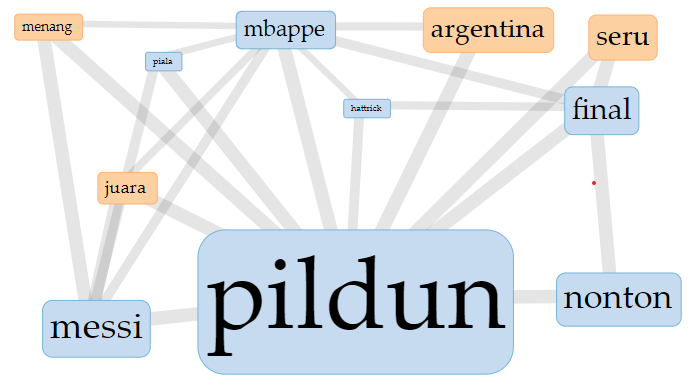

In [ ]:
display.Image("/work/link 2.png")

Interpretasi:

Jika dilihat menggunakan visualisasi link, kita bisa melihat konteks apa yang sedang dibahas terkait kata-kata yang muncul tersebut. Seperti dalam kata "pildun" yang sering dikaitkan dengan nonton, pembahasan tentang final, juara, dan menang. Jika kita selidiki lebih jauh tentang kata "messi", kebanyakan orang mengaitkannya dengan juara pildun. Contohnya, ketika salah satu Netizen menyebutnya pemain terbaik (GOAT).

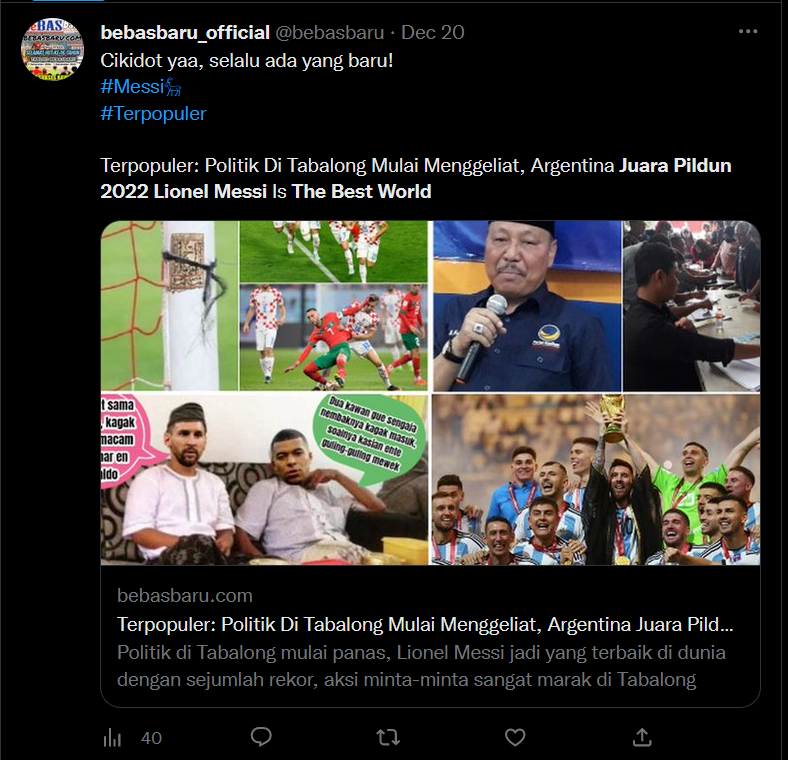

In [ ]:
from IPython import display
display.Image("/work/messi.png")

### Trends

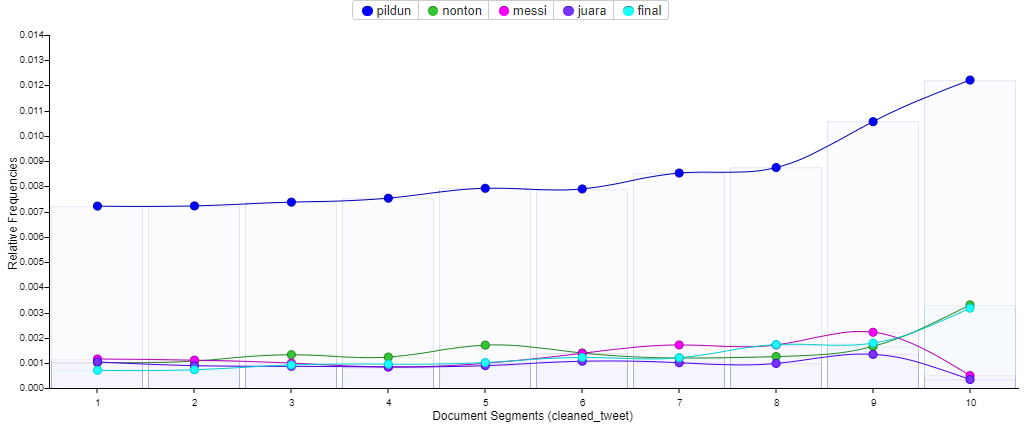

In [ ]:
display.Image("/work/tren.png")

Interpretasi:

Visualisasi di atas menunjukkan tren dari 5 kata dengan frekuensi kemunculan tertinggi. Terlihat bahwa kata "pildun" memiliki frekuensi yang paling tinggi dan trennya terus meningkat. Kemudian jika kita lihat pada kata "nonton" dan "final", keduanya terlihat memiliki tren meningkat di akhir. Hal ini kemungkinan karena menjelang akhir periode piala dunia, banyak netizen yang membahas terkait final. Kemudian jika kita lihat pada kata "messi" dan "juara", keduanya terlihat memiliki pola tren yang sama, yang mengindikasikan adanya korelasi yang kuat di antara keduanya. Hal ini kemungkinan terjadi karena banyak orang yang mengaitkan Messi dengan kemenangan. 

## Text Mining, NLP, Social Media Analytics

Dengan prinsip scrapping data sebelumnya, yang diambil keyword 'pildun' pada rentang periode Piala Dunia, yaitu 19 November 2022 hingga 20 Desember 2022 berjumlah 12,000 tweets, kami dapat menyajikan beberapa analisa Text Mining & NLP menggunakan Software Data Mining: Orange. Orange mempermudah user mengolah data open source serta melaksanakan proses data analytics secara intuitif, sehingga kami tertarik menggunakan Orange dalam penelitian.

Adapun teknik yang akan dibahas pada Text Mining dan NLP:
- Clustering: t-SNE
- TF-IDF
- Text Collocation
- Analisis Sentimen

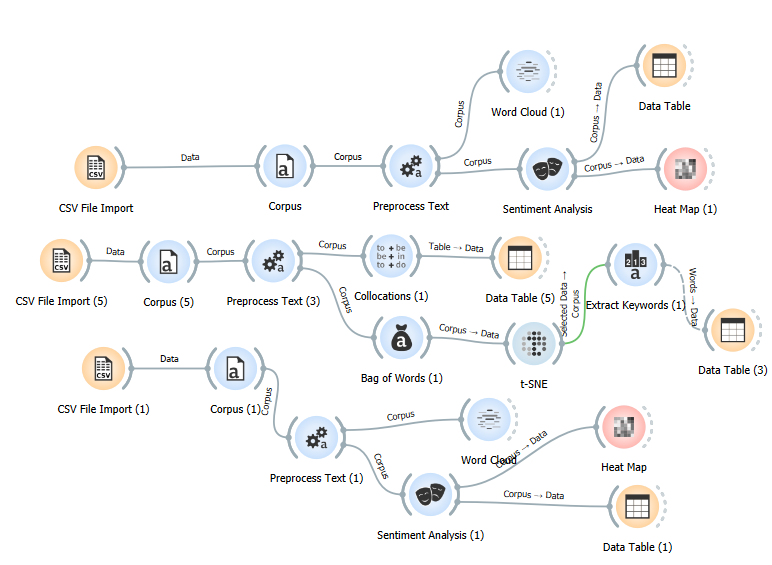

In [ ]:
display.Image("/work/orange.png")

### Clustering: t-SNE

Widget t-SNE memplot data dengan metode t-distributed stochastic neighbor embedding. t-SNE adalah teknik reduksi dimensi, mirip dengan MDS, di mana titik dipetakan ke ruang 2-D dengan distribusi probabilitasnya. Dalam t-SNE, digunakan PCA untuk reduksi dimensi.

Setelah preprocessing, dibuat document-term-matrix menggunakan widget **Bag of Words** dengan pengaturan IDF. Selanjutnya, kami meneruskan data ke t-SNE untuk mengamati peta tweet. t-SNE mengolah document-term-matrix dan menemukan proyeksi 2D, di mana words serupa terletak berdekatan. Berikut hasil t-SNE:

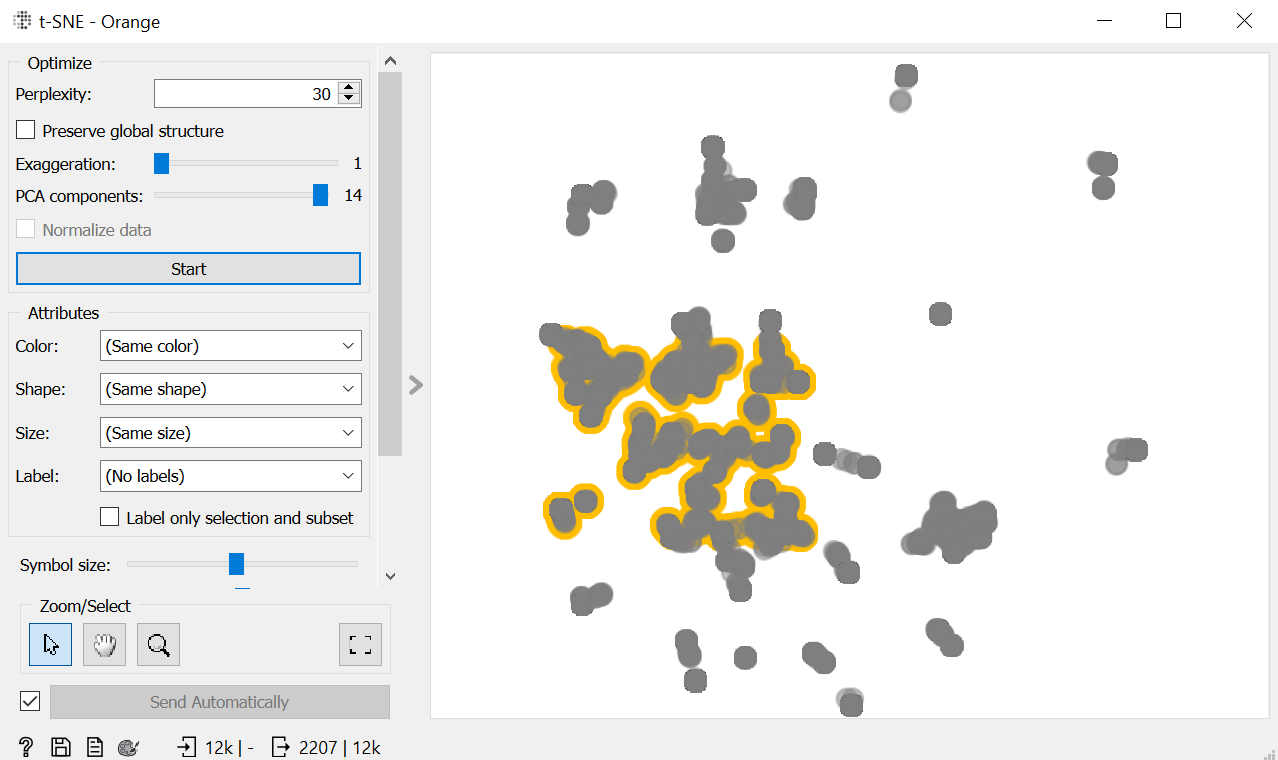

In [ ]:
from IPython import display
display.Image("/work/tsne.png")

Sekarang akan dipilih subset dari tweets, uniknya hanya terlihat 1 cluster yang menonjol, hal tersebut kemungkinan diakibatkan karena topik dari tweet-tweet yang dibahas bersifat homogen. Akan dipilih cluster besar pada tengah gambar (yang dihighlight), di mana kita memiliki sekelompok titik yang berkumpulan. Pertanyaannya adalah, apa yang dibicarakan tweet-tweet ini?

Untuk menjawab pertanyaan diatas dalam mencari keywords paling signifikan, kita gunakan widget **Extract Keywords**

Akan digunakan metode TF-IDF dalam pengekstraksi keywords. TF-IDF merupakan ukuran statistik yang digunakan untuk mengevaluasi seberapa penting sebuah kata di dalam sebuah dokumen atau dalam penelitian ini, sekumpulan tweets.

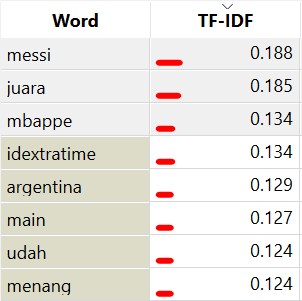

In [ ]:
display.Image("/work/tfidf.png")

Berikut top 8 kata-kata pada tweets. Kata teratas berisikan tentang **'messi'** (Kapten Team Argentina) dan **'juara'**. Rupanya, tweets-tweets tersebut kebanyakan berbicara tentang Messi yang menjadi juara pada Piala Dunia 2022. Diikuti juga dengan **'mbappe'** (Striker Team Prancis). Dari sekian banyak tweets yang terkumpul pada periode waktu piala dunia 2022, keywords paling signifikan diperkirakan merupakan kata-kata yang membicarakan tentang Final Piala Dunia (Argentina vs Prancis)

Di antara keywords tersebut, **'idextratime'** juga merupakan kata yang kerap di-tweet oleh user twitter yang membicarakan tentang Piala Dunia (disingkat: pildun) Karena kata tersebut tidak familiar, akan kami gali lebih lanjut.

Ternyata, idextratime (@idextratime) merupakan akun sepak bola non-formal yang aktif dalam memposting tweets tentang sepak bola secara keseluruhan. Akun tersebut diikuti oleh 571.9K users. Pada periode Final Piala Dunia 2022 (18-19 Desember) akun tersebut banyak memposting tweets, dapat dilihat pada chart dibawah (sumber: https://socialbearing.com/) Sehingga masuk akal bahwa idextratime masuk dalam kata-kata signifikan dalam sekumpulan tweets yang telah kami scrape.  

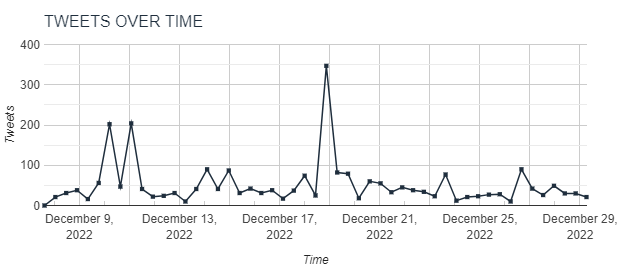

In [ ]:
display.Image("/work/idextratime chart.png")

Dengan scraping data user idextratime, kami dapat melihat top liked tweet dari akun tersebut. Kebetulan sekali, tweet dengan likes terbanyak akun idextratime dipost saat Final Piala Dunia 2022, yaitu 19 Desember 2022 jam 2 subuh, lebih tepatnya sesudah adu penalti yang sengit. Tweet tersebut juga memiliki 1.5 juta views dan 40.9 ribu likes.

https://twitter.com/idextratime/status/1604561712094490625?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1604561712094490625%7Ctwgr%5Ee01d49c807c12d59ec368e75613a53c346cf1928%7Ctwcon%5Es1_&ref_url=https%3A%2F%2Fwww.tweetsort.io%2F

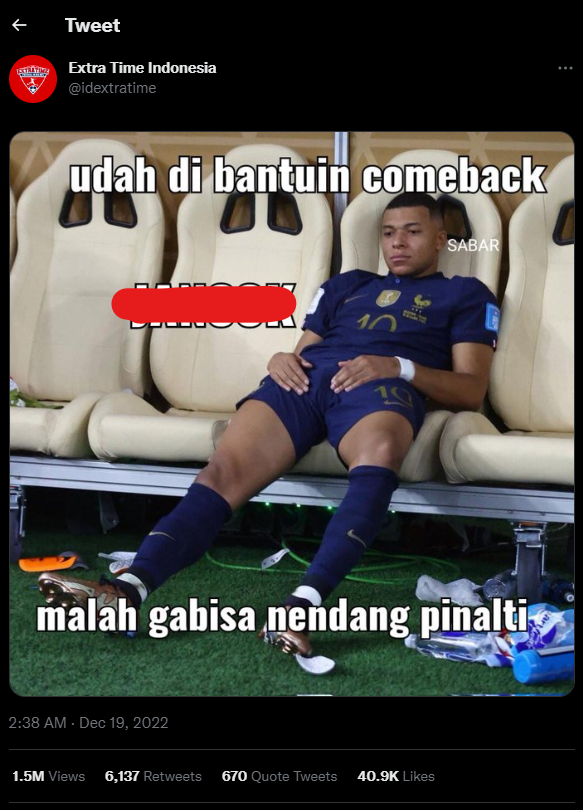

In [ ]:
display.Image("/work/toptweetidextratime.png")

### Analisis Sentimen

Dari analisis sebelumnya, terlihat bahwa user-user twitter Indonesia pada periode Piala Dunia 2022 lebih banyak memposting tweet terkait Final Piala Dunia 2022 - Argentina vs Prancis, uniknya lagi kata-kata yang sering di-tweet lebih banyak tentang Messi dan Mbappe. Hal tersebut dimungkinkan karena mereka merupakan Top Player dari Tim Nasionalnya masing-masing, serta sengitnya pertarungan dengan score 3-3 dimana Messi menyumbang 2 gol untuk Argentina dan Mbappe 3 gol untuk Prancis.

Momen itu membawa kami ke pertanyaan "Bagaimana emosi/sentimen netizen twitter terhadap Messi ataupun Mbappe pada saat pertarungan sengit tersebut?"

Untuk itu, kami lakukan scrapping data dengan keyword 'messi' dan 'mbappe' masing-masing pada saat Final Piala Dunia 2022 berlangsung, yaitu tanggal 18 Desember 2022 pukul 22.00 hingga tanggal 19 Desember 2022 pukul 01.30. 

Dari data yang terkumpul tersebut, kami lakukan preprocessing serta penerjemahan ke dalam bahasa inggris pada python dengan menerapkan code:

    !pip install googletrans==3.1.0a0

    translator = Translator()
    translations = {}
    for column in df.columns:
        unique_elements = df[column].unique()
        for element in unique_elements:
            translations[element] = translator.translate(element).text
    translations

Kemudian data set disimpan dengan code:

    df.to_csv('mbappe_translate.csv',encoding="utf8", index=False)

Sehingga dapat melakukan analisis sentimen Lexicon dengan metode Vader pada software Orange.


Berikut cuplikan Table dari hasil Analisis Sentimen pada tweets dengan keyword Mbappe:

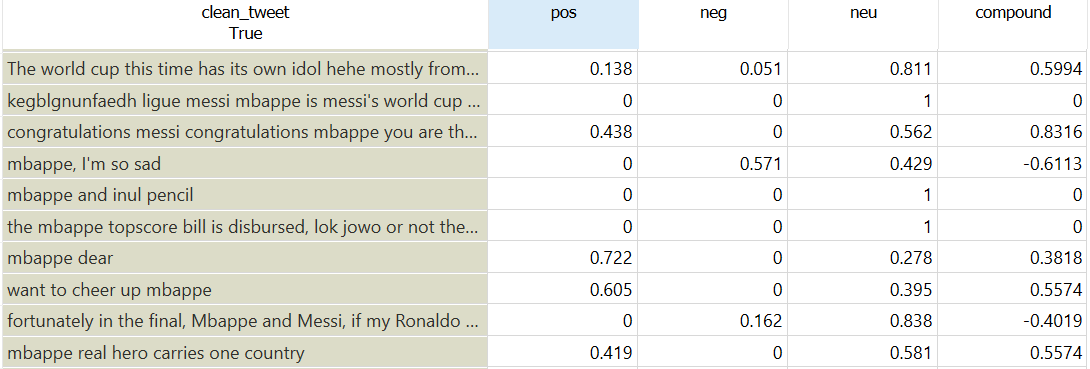

In [ ]:
display.Image("/work/ss mbappe.png")

Berikut cuplikan Table dari hasil Analisis Sentimen pada tweets dengan keyword Messi:

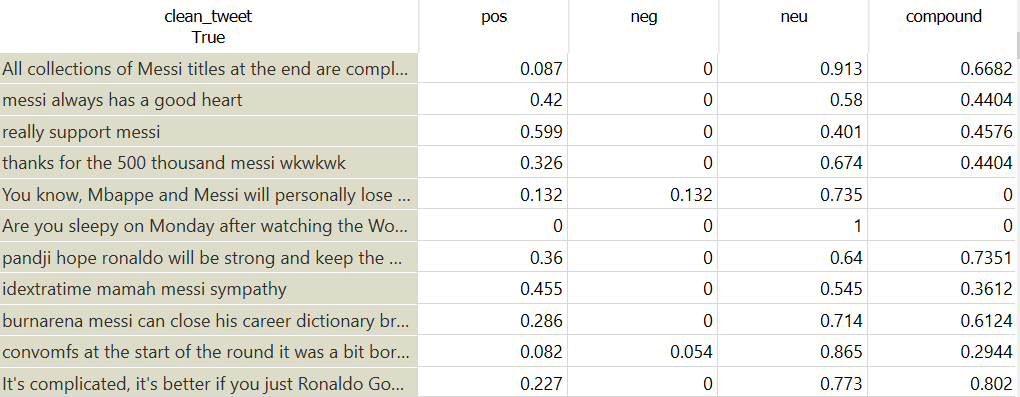

In [ ]:
display.Image("/work/ss messi.png")

Terlihat dari kedua tabel bahwa terdapat data yang menunjukan sentimen positif/negatif, ada pun data tweet yang bersifat ambigu. Sekarang akan kami gali lebih lanjut untuk mengobservasi visualisasi sentimen positif/negatif pada masing-masing Top Player

**Heatmap Sentimen Analisis - Mbappe**

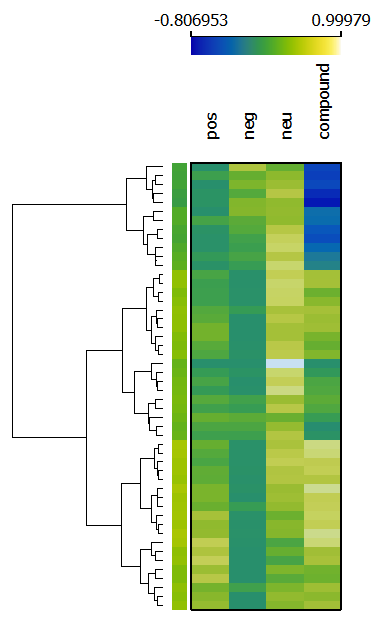

In [ ]:
display.Image("/work/mbappe heatmap.png")

**Heatmap Sentimen Analisis - Messi**

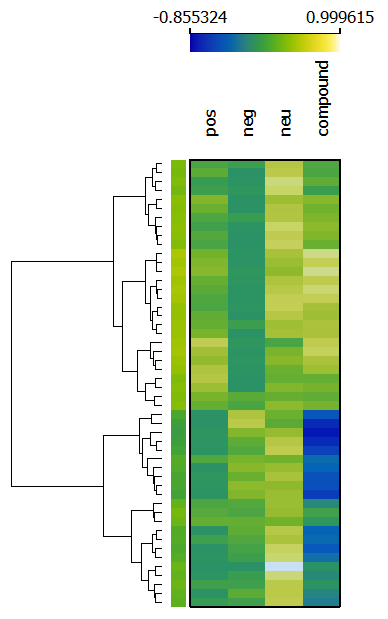

In [ ]:
display.Image("/work/messi heatmap.png")


Kemudian kita juga dapat mengamati sentimen general dari netizen twitter pada periode Piala Dunia 2022 dari keyword "pildun", pertama-tama kita lihat frekuensi collocations yaitu kata tertentu dengan kata lain atau kumpulan 2 kata dengan frekuensi tinggi dibanding kata-kata lainnya. Dari hal tersebut, dapat dilihat lebih jelas lagi apa yang dibicarakan tweet-tweet dan bagaimana perkiraan awal sentimennya.

Kami menggunakan widget **collocations** pada Orange dengan output:

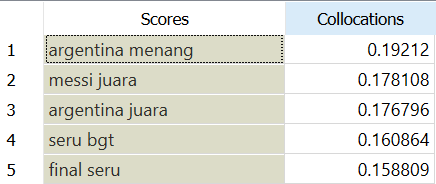

In [ ]:
display.Image("/work/collocations.png")

Seperti pada bagian sebelumnya, terbukti bahwa netizen twitter lebih banyak membicarakan tentang Final Piala Dunia 2022 dengan top 3 scores tentang kemenangan Timnas Argentina dan Messi. Perhatikan score ke-4 dan ke-5 dengan kata-kata "seru bgt" dan "final seru" yang pada dasarnya bersentimen positif. Sehingga, kemungkinan sentimen terhadap Piala Dunia 2022 mayoritas bersifat positif.

## Social Network Analysis

In [ ]:
pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 76.0 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import warnings; warnings.simplefilter('ignore')
import nltk
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
users = df.username.to_list()
tweets = df.tweet.to_list()
print( users[:7] )

['tusukgigiajaib', 'komuluna', 'seblakperongga', 'Bakwanweciote2', 'Sabilputra34', 'lompatjauhh', 'lunaT___T']


In [ ]:
print( tweets[:3] )

['@FaktaSepakbola Nobar final pildun di SMS aja kayak tai yg baru dateng nyelonong ke depan gamau duduk padahal orang2 udah pada lesehan', '@convomf budak tiktok pildun ya gini  https://t.co/jAllpgmnJc', '@plumgorjes Berasa pildun yaaak wkwkwkwk, semenjak tragedi #UsutTuntasTragediKanjuruhan masih males buat nyetadion. Ini lagi perkara kek gini bukannya jd pembelajaran hadehh']


In [ ]:
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab
    IN_COLAB = True
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")
except:
    IN_COLAB = False
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataEDA02CTA.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.dic
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger

    !pip install spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !pip install unidecode twython beautifulsoup4 pyLDAvis json_lines
    !pip install networkx scipy
    !pip install --upgrade tweepy
    !python -m spacy download xx_ent_wiki_sm
    !python -m spacy download en_core_web_sm
    nltk.download('popular')

                                                                                 ^
      /usr/local/include/python3.9/cpython/unicodeobject.h:264:8: note: in expansion of macro ‘PyUnicode_WSTR_LENGTH’
              PyUnicode_WSTR_LENGTH(op)))
              ^~~~~~~~~~~~~~~~~~~~~
      pycrfsuite/_pycrfsuite.cpp:13846:52: note: in expansion of macro ‘PyUnicode_GET_SIZE’
                           (PyUnicode_GET_SIZE(**name) != PyUnicode_GET_SIZE(key)) ? 1 :
                                                          ^~~~~~~~~~~~~~~~~~
      /usr/local/include/python3.9/cpython/unicodeobject.h:446:26: note: declared here
       static inline Py_ssize_t _PyUnicode_get_wstr_length(PyObject *op) {
                                ^~~~~~~~~~~~~~~~~~~~~~~~~~
      /usr/local/include/python3.9/cpython/unicodeobject.h:451:75: warning: ‘Py_ssize_t _PyUnicode_get_wstr_length(PyObject*)’ is deprecated [-Wdeprecated-declarations]
       #define PyUnicode_WSTR_LENGTH(op) _PyUnicode_get_wstr_length((PyOb

In [ ]:
!pip install graphviz
!pip install community

import graphviz,taudata_sna as tau
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, networkx as nx 
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()
from graphviz import Digraph

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 KB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 36.5 MB/s eta 0:00:00
  Created wheel for community: filename=community-1.0.0b1-py3-none-any.whl size=2154 sha256=f0d6b7e1b5b6c4f9d9d6f388d86efcf3dd7d10d0eb0958b6539505a9f96362ed
  Stored in directory: /root/.cache/pip/wheels/e5/32/7b/aebaa96975f39189b78d7b123cf90e5fd2f0418953833b3043
Successfully built community
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Not uninstalling markupsafe at /shared-libs/python3.9/py-core/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'MarkupSafe'. No files were found to uninstall.
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Not uninstalling jinja2 at /shared-libs/pyt

In [ ]:
G = nx.Graph() #Graph Kosong Baru
G.add_nodes_from(users) #menambahkan nodes dari data username 

print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  16059
Banyak Edges =  0


In [ ]:
#menggunakan mention untuk mencari banyak edges dari G
import re

t = "@convomf budak tiktok pildun ya gini  https://t.co/jAllpgmnJc"
mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", t)

mentionS

['convomf']

In [ ]:
for usr, t in zip(users, tweets):
    mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", t)
    for mention in mentionS:
        if "." not in mention: #skipping emails
            G.add_edge(usr, mention)
            
print('Banyak vertex = ', G.number_of_nodes()) #print jumlah nodes dari G
print('Banyak Edges = ', G.number_of_edges()) #print jumlah edges dari G

Banyak vertex =  20614
Banyak Edges =  12199


In [ ]:
print("Export ke GexF untuk di import ke Gephi")
nx.write_gexf(G, "pildun1.gexf") #meng-export file dalam bentuk gexf untuk di import ke aplikasi Gephi

Export ke GexF untuk di import ke Gephi


### Centrality Analysis

In [ ]:
#Degree Centrality
Gt = tau.Centrality(G, N=10, method='degree', outliers=False, Label = True, layOut='spring')

Influencial Users: ['idextratime', 'SiaranBolaLive', 'convomfs', 'FaktaSepakbola', 'Askrlfess', 'The', 'utdfocusid', 'tanyakanrl', 'registaco', 'realmadridindo1']
Influencial Users Scores: [0.07713579 0.01358366 0.0107699  0.01004221 0.00912046 0.00785912
 0.00489982 0.00485131 0.00373551 0.00358997]


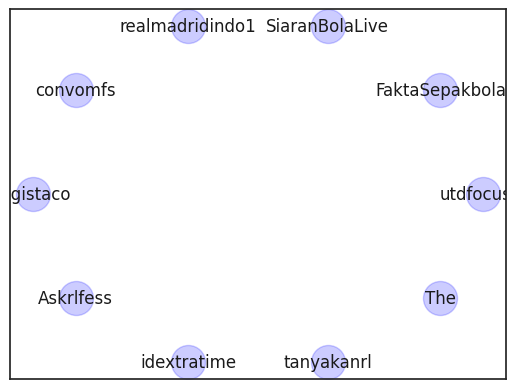

In [ ]:
tau.drawGraph(Gt, True, layOut='circular')

Terdapat 10 node yang memiliki jumlah koneksi atau interaksi paling banyak di antara node yang lainnya, di mana idextratime adalah node dengan jumlah koneksi tertinggi yang kemudian disusul oleh SiaranBolaLive pada peringkat kedua.

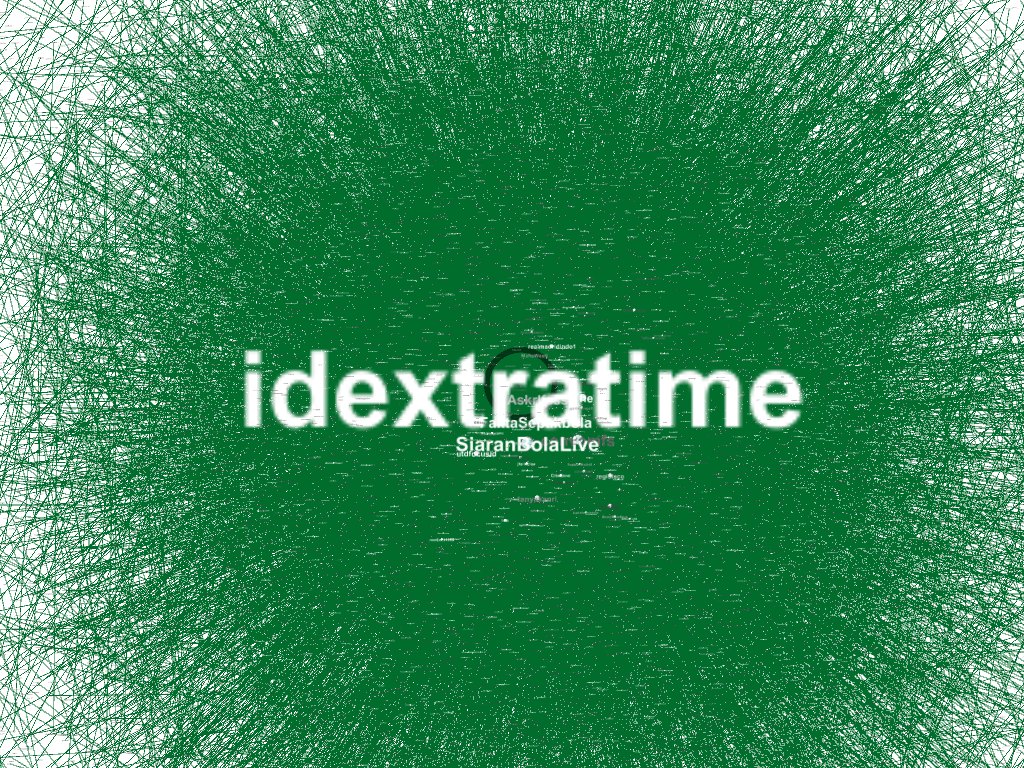

In [ ]:
#Visualisasi dengan Gephi
from IPython import display
display.Image("/work/screenshot_162646.png")

In [ ]:
#Closeness Centrality
Gt = tau.Centrality(G, N=10, method='closeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['idextratime', 'yogies41', 'manczae', 'IqbalQuosophy', 'dpskazuha1', 'Kirasaaa', 'triwantororudi', 'lifRKY', 'mantansekamar', 'Elcapito75']
Influencial Users Scores: [0.12461199 0.0982525  0.09725827 0.09680452 0.09673704 0.09654354
 0.09637172 0.09621302 0.09606316 0.09604238]


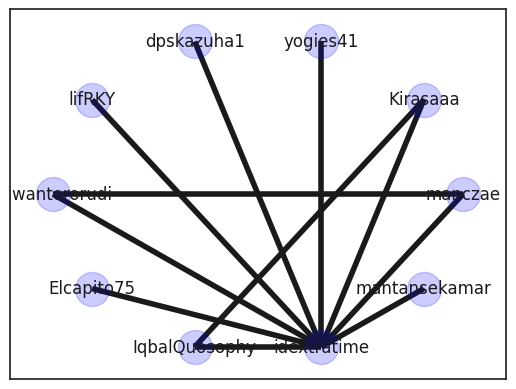

In [ ]:
tau.drawGraph(Gt, True, layOut='circular')

Dapat dilihat pada gambar diatas bahwa idextratime merupakan node yang memiliki paling banyak interaksi, yakni dengan semua akun. Namun, kebanyakan akun lain hanya berinteraksi dengan idextratime saja, seperti akun yogies41, dpskazuha1, dan mantansekamar. 

In [ ]:
#Betweeness Centrality
Gt = tau.Centrality(G, N=10, method='betweeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['idextratime', 'SiaranBolaLive', 'convomfs', 'FaktaSepakbola', 'tanyakanrl', 'Askrlfess', 'The', 'WendyCiledug', 'barbajaa', 'utdfocusid']
Influencial Users Scores: [0.08714661 0.01083031 0.00934178 0.00712335 0.00693009 0.00643719
 0.00604396 0.00398169 0.00391244 0.00306878]


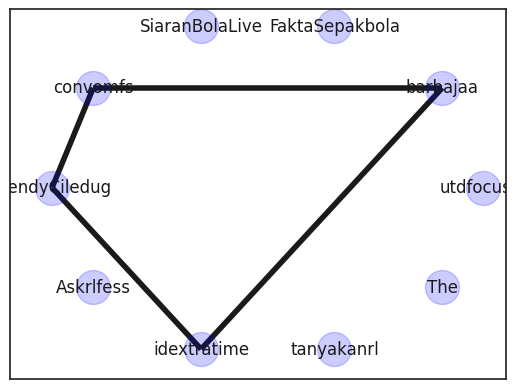

In [ ]:
tau.drawGraph(Gt, True, layOut='circular')

Dari 10 akun diatas, terlihat bahwa:

1. barbajaa menjadi penghubung antara convomfs dan idextratime

undefined. convomfs menjadi penghubung antara barbajaa dan rendyCiledug

undefined. rendyCiledug menjadi penghubung antara convomfs dan idextratime

undefined. idextratime menjadi penghubung antara rendyCiledug dan barbajaa

### Community Detection

In [ ]:
import networkx as nx
import networkx.algorithms.community as nxcom
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})

import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)

In [ ]:
from networkx.algorithms import community
from networkx.algorithms.community import greedy_modularity_communities

In [ ]:
G_karate = nx.karate_club_graph()
# mencari komunitas
communities = sorted(nxcom.greedy_modularity_communities(G_karate), key=len, reverse=True)
# menghitung jumlah komunitas yang terbentuk
print(f"The karate club has {len(communities)} communities.")

The karate club has 3 communities.


In [ ]:
# Clustering pada Graph = Community Detection
Gt1 = nx.algorithms.community.greedy_modularity_communities(G_karate)
for community in Gt1:
    print(community)

frozenset({8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})
frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21})
frozenset({0, 16, 19, 4, 5, 6, 10, 11})


In [ ]:
def set_node_community(G, communities):
  for c, v_c in enumerate(communities):
    for v in v_c:
      # Add 1 to save 0 for external edges
      G.nodes[v]['community'] = c + 1
def set_edge_community(G):
  for v, w, in G.edges:
    if G.nodes[v]['community'] == G.nodes[w]['community']:
      # Internal edge, mark with community
      G.edges[v, w]['community'] = G.nodes[v]['community']
    else:
      # External edge, mark as 0
      G.edges[v, w]['community'] = 0
def get_color(i, r_off=1, g_off=1, b_off=1):
  r0, g0, b0 = 0, 0, 0
  n = 16
  low, high = 0.1, 0.9
  span = high - low
  r = low + span * (((i + r_off) * 3) % n) / (n - 1)
  g = low + span * (((i + g_off) * 5) % n) / (n - 1)
  b = low + span * (((i + b_off) * 7) % n) / (n - 1)
  return (r, g, b)

In [ ]:
# Set node dan edge communities
set_node_community(G_karate, communities)
set_edge_community(G_karate)
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

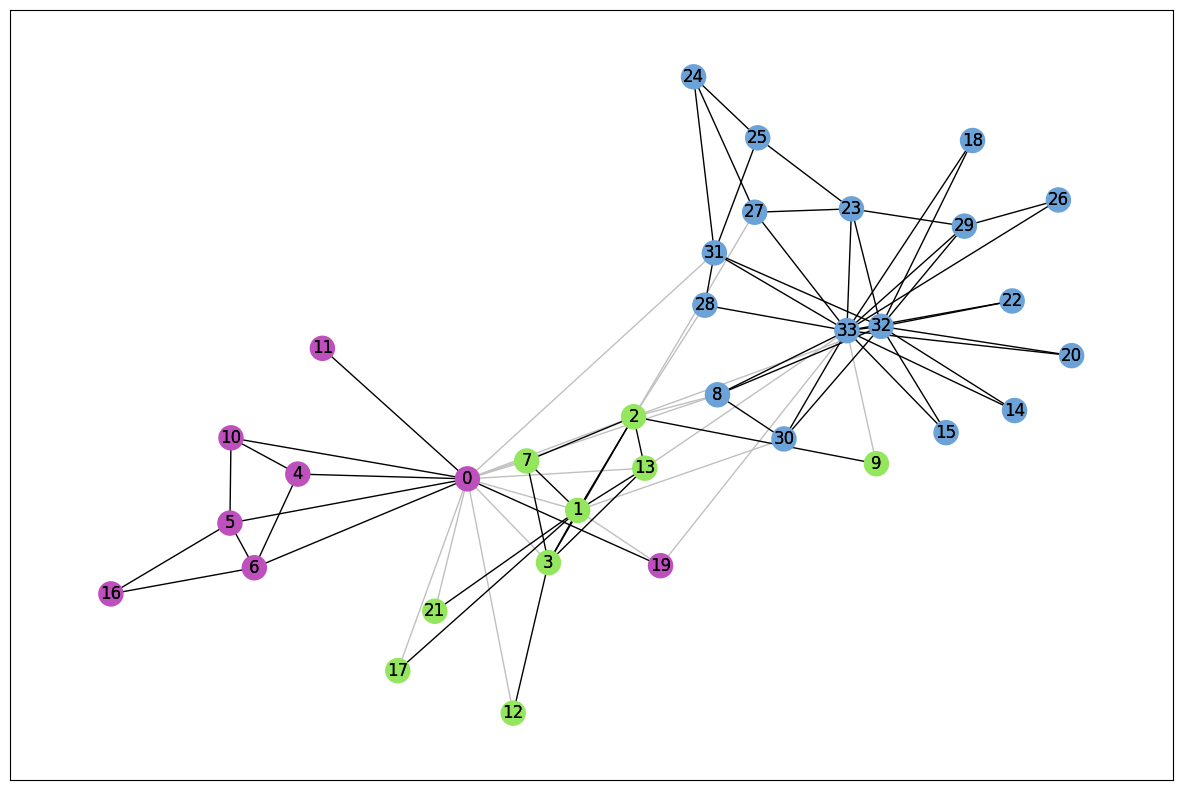

In [ ]:
karate_pos = nx.spring_layout(G_karate)
plt.rcParams.update({'figure.figsize': (15, 10)})
# Draw external edges
nx.draw_networkx(
  G_karate,
  pos=karate_pos,
  node_size=0,
  edgelist=external,
  edge_color="silver")
# Draw nodes dan internal edges
nx.draw_networkx(
  G_karate,
  pos=karate_pos,
  node_color=node_color,
  edgelist=internal,
  edge_color=internal_color)
plt.show(karate_pos)  #memunculkan graph komunitas dari G_karate

Interpretasi:

Terlihat bahwa G_karate memiliki 3 komunitas dengan anggotanya sebagai berikut:

- Komunitas 1 (Biru): 
{8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}
- Komunitas 2 (Hijau): 
{1, 2, 3, 7, 9, 12, 13, 17, 21}
- Komunitas 3 (Ungu): 
{0, 16, 19, 4, 5, 6, 10, 11}


In [ ]:
#menghitung jumlah nodes dan edges dari G_karate
len(G_karate.nodes), len(G_karate.edges)

(34, 78)

Diperoleh G_karate memiliki 34 nodes dan 78 edges.

## Kesimpulan

- Pengguna Twitter, khususnya di Indonesia, lebih sering menggunakan kata informal untuk berinteraksi di media sosial. Hal ini dapat dilakukan oleh pembuat iklan atau orang yang ingin melakukan personal branding yang ingin melakukan engagement dengan anak muda. 

- 
Pada bidang copywriting, copywriter dapat menggunakan kata-kata yang terdapat di hasil social media analytics (collocations, word cloud, dll) untuk membuat konten iklan untuk meningkatkan engagement dan personal branding, khususnya di Twitter. Hal ini juga dapat diterapkan oleh advertiser lainnya yang menargetkan generasi muda.


- Pada bidang marketing, perusahaan dapat membuat kerja sama dengan orang-orang atau akun sosial media yang memiliki banyak koneksi untuk meng-influence produk perusahaan.

- Piala Dunia 2022 dilakukan setiap 4 tahun sekali dan selalu dinanti oleh setiap orang. Banyak orang mengikuti acara Piala Dunia untuk turut merasakan euforia acara besar ini. Momen ini dapat digunakan untuk melakukan berbagai agenda yang dapat diselipkan dalam acara ini. Mulai dari sosialisasi produk atau agenda atau hal tertentu hingga meningkatkan penjualan suatu produk. Maka, kami merekomendasikan untuk turut meramaikan acara ini, ride the wave.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1c9822af-3dff-429d-bdd9-698a18dae36c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>